In [47]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_200820'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        df['exp'] = file.split("_")[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [48]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [49]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [50]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [51]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [52]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index
count,1593.000000,1593.0,1593.000000,1593.0,1.593000e+03,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,25.657250,64.0,0.003259,32.0,1.000000e-04,0.041406,0.423729,0.681009,68.015283,0.682302,103.585233,16.905838
std,18.706656,0.0,0.003680,0.0,2.711357e-20,0.040439,0.667339,0.108351,69.870790,0.114575,236.999815,10.981079
min,0.000000,64.0,0.000100,32.0,1.000000e-04,0.000000,0.000000,0.485577,2.071014,0.489183,2.075855,0.000000
25%,10.000000,64.0,0.000500,32.0,1.000000e-04,0.000000,0.000000,0.570312,5.254107,0.567575,5.267828,7.000000
50%,21.000000,64.0,0.001000,32.0,1.000000e-04,0.050000,0.000000,0.719752,72.035759,0.716680,75.835739,14.000000
75%,39.000000,64.0,0.005000,32.0,1.000000e-04,0.100000,1.000000,0.786158,105.392525,0.793136,110.648842,27.000000
max,69.000000,64.0,0.010000,32.0,1.000000e-04,0.100000,2.000000,0.837440,595.252808,0.851763,1986.817871,36.000000


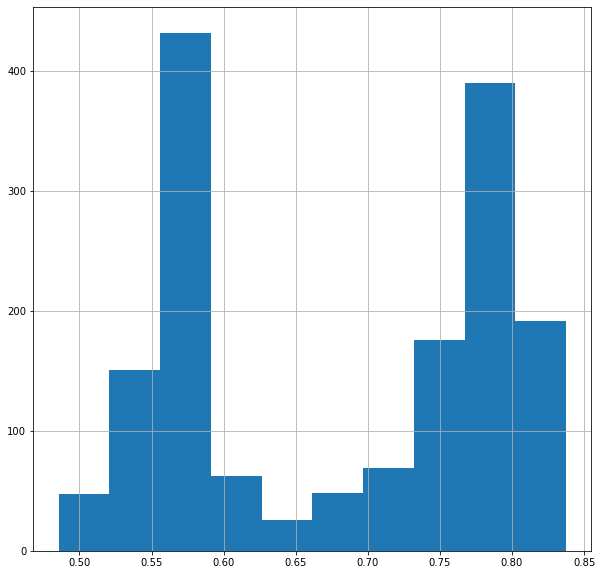

In [53]:
big_df['val_acc'].hist(figsize=(10, 10))

In [54]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [55]:
best_df = pd.DataFrame(best_rows)

In [56]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index,exp
23,7,64,0.0100,32,0.0001,0.01,2,yes,0.550180,3.058193,0.543803,3.508614,23,3
32,8,64,0.0050,32,0.0001,0.01,1,yes,0.579928,5.149339,0.573918,5.083934,32,7
21,8,64,0.0100,32,0.0001,0.01,0,yes,0.576122,4.538862,0.563101,4.478766,21,3
33,9,64,0.0050,32,0.0001,0.01,2,yes,0.587640,5.782652,0.582532,5.802217,33,7
19,10,64,0.0100,32,0.0001,0.05,1,yes,0.565405,4.142528,0.560764,4.156717,19,2
16,10,64,0.0100,32,0.0001,0.10,1,yes,0.577424,4.284455,0.570913,4.245994,16,1
30,11,64,0.0050,32,0.0001,0.05,1,yes,0.577925,5.534355,0.578325,5.593149,30,6
20,11,64,0.0100,32,0.0001,0.05,2,yes,0.583534,4.727664,0.569712,4.408720,20,2
1,12,64,0.0100,32,0.0001,0.00,1,yes,0.568710,5.569712,0.562233,5.597957,1,0
15,12,64,0.0100,32,0.0001,0.10,0,yes,0.582632,4.522636,0.569645,4.452658,15,1


In [57]:
print("Dataframe with means for trials")
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size"])
mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])


Dataframe with means for trials


In [58]:
best_df.sort_values(by=["cost_per_sample", "surprisal_cost"])
# mean_df.min()


,epoch,cost_per_sample,surprisal_cost,trial,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index,exp
11,66,0.0001,0.00,0,yes,0.822516,169.830124,0.829728,156.198318,11,6
14,66,0.0001,0.01,0,yes,0.828626,174.433701,0.836071,165.067047,14,9
13,68,0.0001,0.05,0,yes,0.829227,176.217255,0.839543,179.624329,13,8
12,68,0.0001,0.10,0,yes,0.837440,268.162048,0.851095,266.561218,12,7
5,68,0.0005,0.00,0,yes,0.818810,109.082130,0.816907,100.923012,5,2
9,62,0.0005,0.01,0,yes,0.810897,98.120689,0.818710,102.735046,9,5
10,33,0.0005,0.01,1,yes,0.800180,103.252304,0.796675,104.234711,10,5
7,67,0.0005,0.05,0,yes,0.816206,113.549782,0.823518,112.927414,7,4
8,32,0.0005,0.05,1,yes,0.796074,127.589844,0.797676,116.570244,8,4
6,68,0.0005,0.10,0,yes,0.823518,125.470650,0.831931,124.608574,6,3


In [59]:
# lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 fi

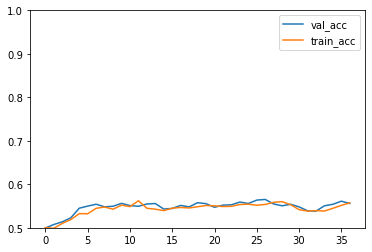

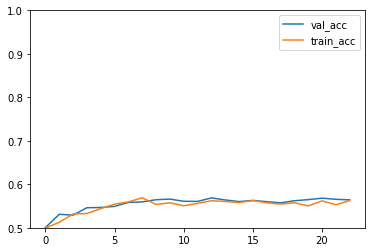

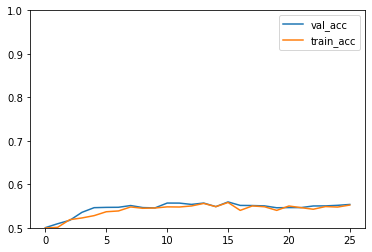

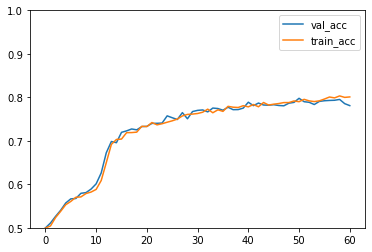

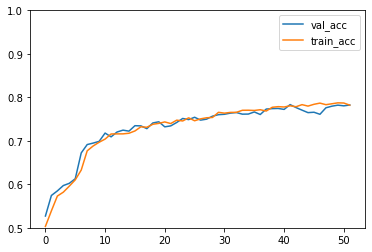

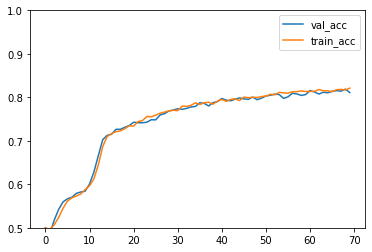

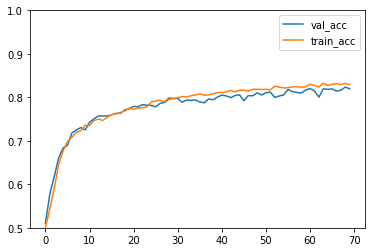

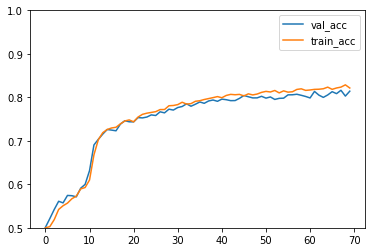

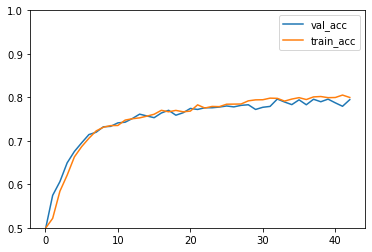

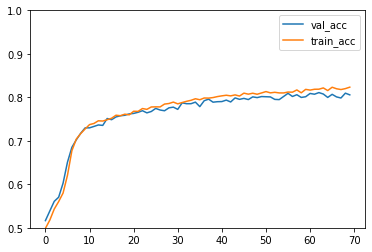

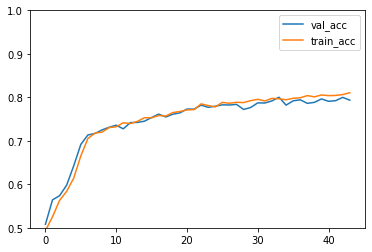

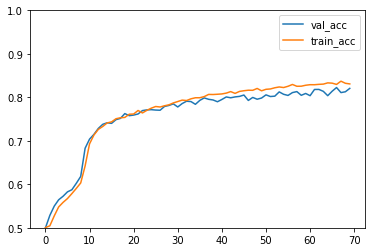

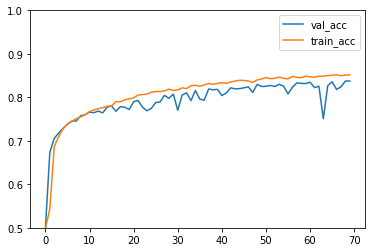

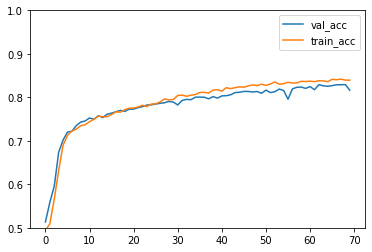

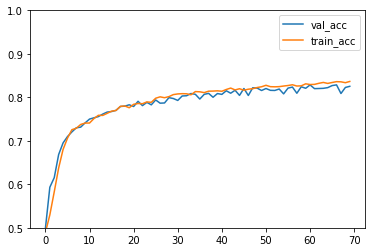

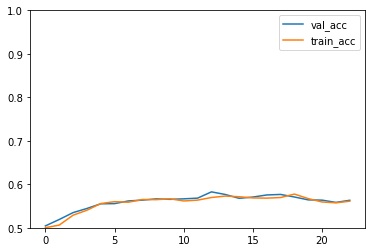

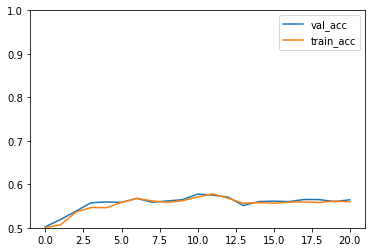

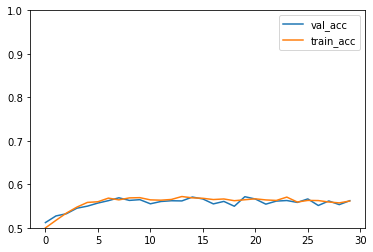

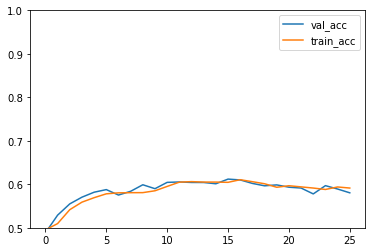

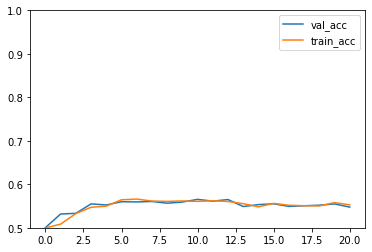

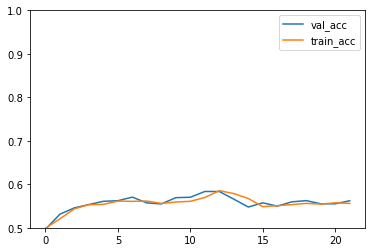

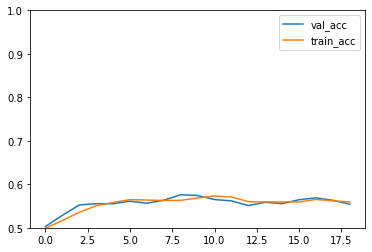

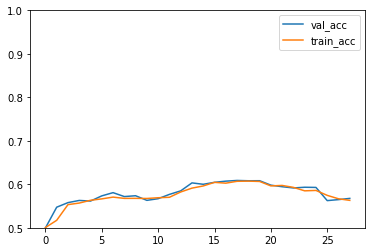

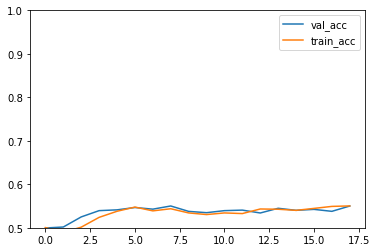

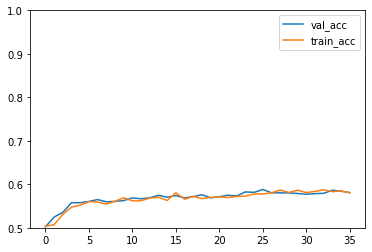

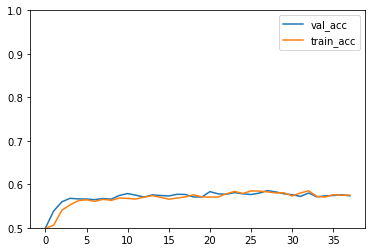

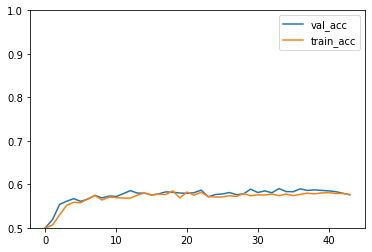

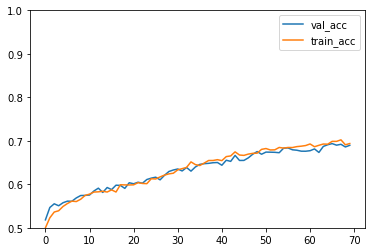

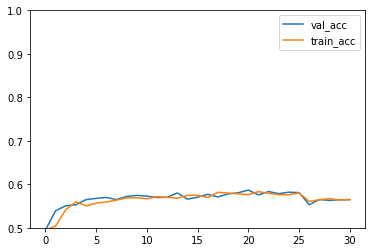

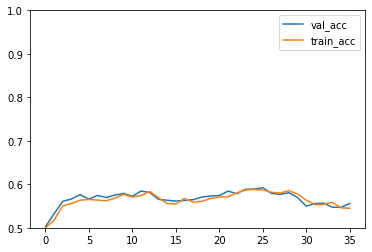

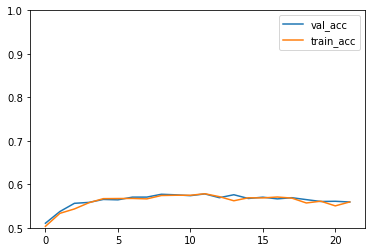

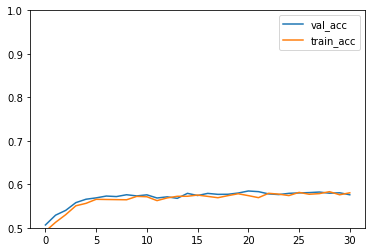

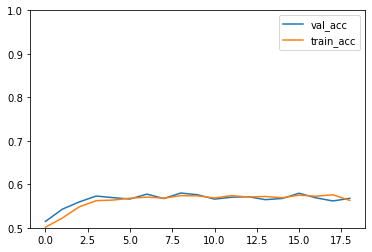

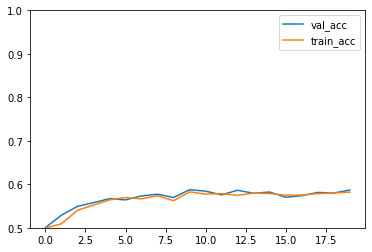

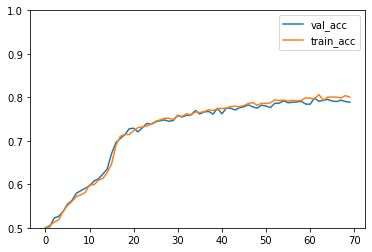

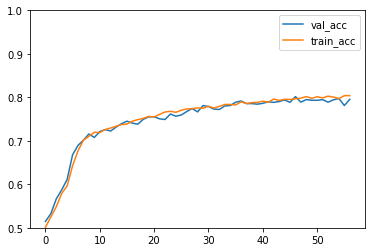

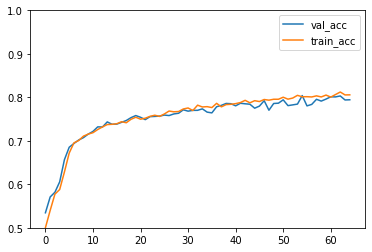

In [60]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    ax = df[['val_acc', 'train_acc']].plot()
    ax.set_ylim(0.5, 1)
    ax.get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}.png")

In [61]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [62]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff()
# best_hyper_diff.iloc[40:].abs().mean()


In [63]:
csvs[11]

best_df.sort_values(by='val_acc')

,epoch,cost_per_sample,surprisal_cost,trial,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index,exp
23,7,0.0100,0.01,2,yes,0.550180,3.058193,0.543803,3.508614,23,3
2,15,0.0100,0.00,2,yes,0.559495,3.964643,0.558226,4.018296,2,0
0,26,0.0100,0.00,0,yes,0.565204,2.446815,0.553753,2.413862,0,0
19,10,0.0100,0.05,1,yes,0.565405,4.142528,0.560764,4.156717,19,2
1,12,0.0100,0.00,1,yes,0.568710,5.569712,0.562233,5.597957,1,0
17,19,0.0100,0.10,2,yes,0.571514,5.243590,0.564503,5.174145,17,1
21,8,0.0100,0.01,0,yes,0.576122,4.538862,0.563101,4.478766,21,3
16,10,0.0100,0.10,1,yes,0.577424,4.284455,0.570913,4.245994,16,1
30,11,0.0050,0.05,1,yes,0.577925,5.534355,0.578325,5.593149,30,6
32,8,0.0050,0.01,1,yes,0.579928,5.149339,0.573918,5.083934,32,7
